<h1>Simple tool for displaying correlation between time of post and sentiment</h1>
<p>Currently written to use the Tweets.csv labelled dataset but easily tweaked to use the labels produced from our own model</p>

<p>Imports and collect tweets</p>

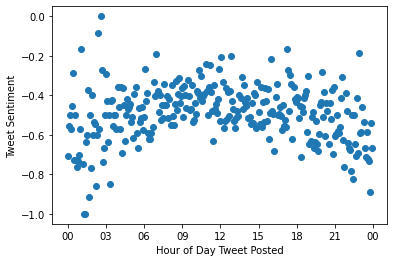

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
import csv
from datetime import datetime, timedelta
import math

tweets = []

with open('Tweets.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    next(reader)
    for row in reader:
        filtered_row = [row[1], row[2], row[12]]
        tweets.append(filtered_row)

<p>Create a dictionary with datetime object keys using 5 minute intervals for every hour of the day</p>

In [ ]:
# get list of tweet_sentiment and times

def get_time(tweet):
    tweet[2]= tweet[2][:-6]
    time = datetime.strptime(tweet[2], '%Y-%m-%d %H:%M:%S')
    time = time.replace(year=1900, month=1, day=1)
    return time

# populate a dictionary with datetime objects representing
# 5 minute intervals from 00:00 to 23:55
sentiment_time_dict = {}
minute_interval = 5
i = datetime.strptime('00:00', '%H:%M')
terminate = datetime.strptime('23:55', '%H:%M')

# add 5 minute intervals to sentiment_time_dict
while i <= terminate:
    # first index is sentiment sum, second number tweets
    sentiment_time_dict[i] = [0, 0]
    i += timedelta(minutes=5)

<p>Iterate through tweets to extract time of posting and sentiment</p>

In [ ]:

# get the tweet's time, identify nearest entry in dictionary
# and add to the dict entry's sentiment sum and tweet count
for tweet in tweets:
    tweet_time = get_time(tweet)
    # how to find nearest window
    window = tweet_time.replace(minute= tweet_time.minute - (tweet_time.minute % 5), second=0)
    #print(window)
    sentiment_time_dict[window][1] += 1
    if tweet[0] == 'positive':
        sentiment_time_dict[window][0] += 1
    elif tweet[0] == 'negative':
        sentiment_time_dict[window][0] -= 1

times = list(sentiment_time_dict.keys())
# get a list of the mean sentiments for each five minute window
sentiments = []
for time in sentiment_time_dict:
    # if at least 1 tweet in this window
    if sentiment_time_dict[time][1] != 0:
        sentiments.append(sentiment_time_dict[time][0] / sentiment_time_dict[time][1])
    # if no tweets in this period
    else:
        sentiments.append(0)

<p>Display on scatter graph</p>

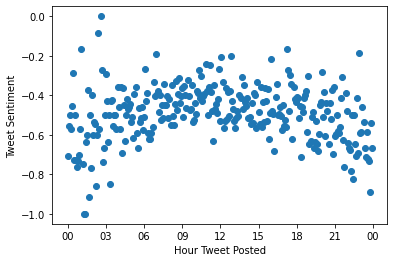

In [11]:
min_time = datetime.strptime('00:00', '%H:%M')
max_time = datetime.strptime('00:00 02-01-1900', '%H:%M %d-%m-%Y')

(fig, ax) = plt.subplots(1, 1)
ax.scatter(times, sentiments)
ax.xaxis.set_major_formatter(DateFormatter('%H'))
ax.set_xlabel('Hour Tweet Posted')
ax.set_ylabel('Tweet Sentiment')
plt.show()